# Explore here

In [1]:
# Your code here
import pandas as pd

datos_medicos = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
datos_medicos.shape

(1338, 7)

In [3]:
datos_medicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
datos_medicos.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
datos_medicos = datos_medicos.drop_duplicates().reset_index(drop = True)
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
datos_medicos.shape

(1337, 7)

In [7]:
datos_medicos.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
datos_medicos.duplicated().sum()

np.int64(0)

In [9]:
datos_medicos = datos_medicos.drop_duplicates().reset_index(drop = True)
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
datos_medicos.duplicated().sum()

np.int64(0)

In [11]:
cat_cols = datos_medicos.select_dtypes(include=['object']).columns.tolist()
num_cols = datos_medicos.select_dtypes(include=['int64', 'float64']).columns.tolist()

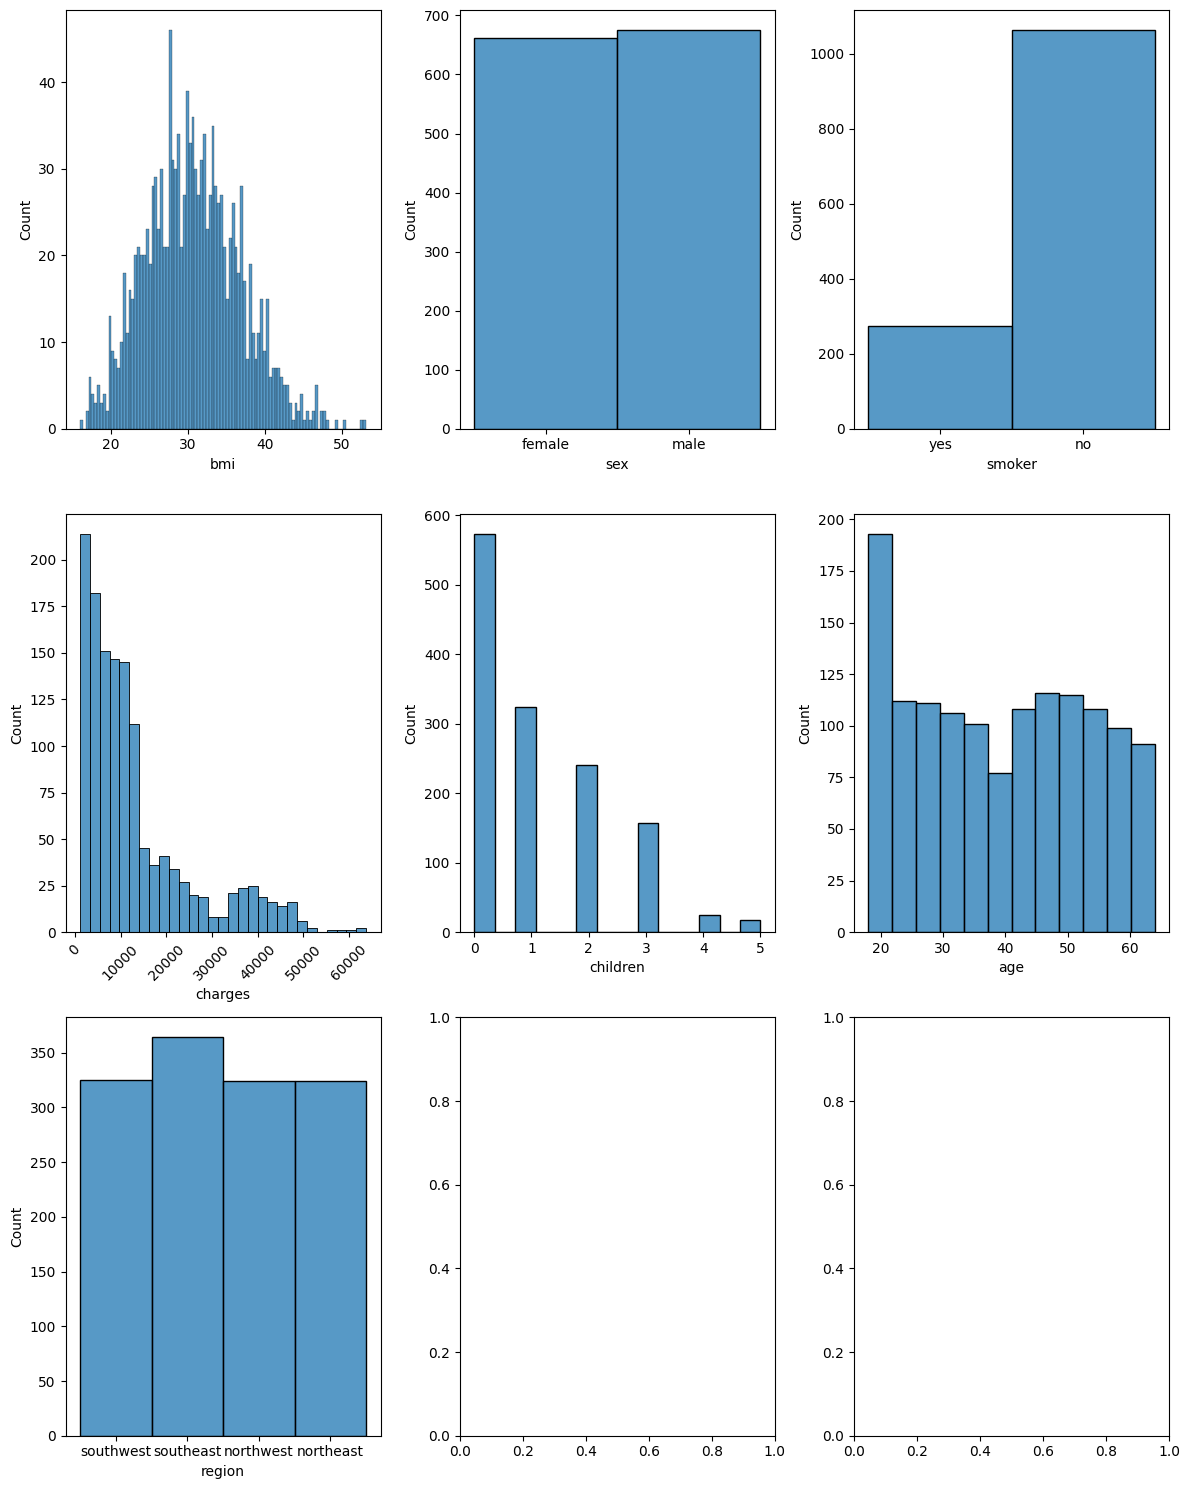

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 3, figsize = (12, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = datos_medicos, x = "bmi",bins=100)
sns.histplot(ax = axis[0, 1], data = datos_medicos, x = "sex")
sns.histplot(ax = axis[0, 2], data = datos_medicos, x = "smoker")
sns.histplot(ax = axis[1, 0], data = datos_medicos, x = "charges").tick_params(axis='x', rotation=45)
sns.histplot(ax = axis[1, 1], data = datos_medicos, x = "children")
sns.histplot(ax = axis[1, 2], data = datos_medicos, x = "age")
sns.histplot(ax = axis[2, 0], data = datos_medicos, x = "region")

plt.tight_layout()

# Mostrar el plot
plt.show()

### Limitare los datos de cargas que sean menos de 60000, con el que no mostraria 10% de datos, calculando los outliers del campo charges.

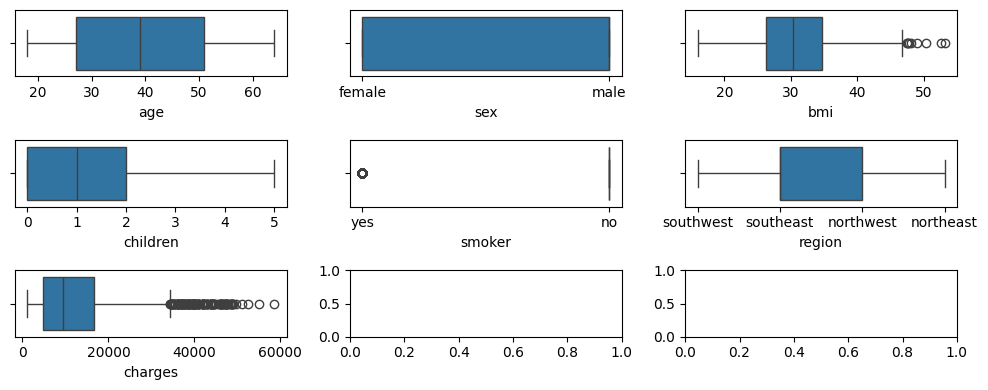

In [13]:
fig, axis = plt.subplots(3, 3, figsize = (10, 4))

dm_charges = datos_medicos[datos_medicos['charges']<60000]

sns.boxplot(ax = axis[0, 0], data = datos_medicos, x = "age")
sns.boxplot(ax = axis[0, 1], data = datos_medicos, x = "sex")
sns.boxplot(ax = axis[0, 2], data = datos_medicos, x = "bmi")
sns.boxplot(ax = axis[1, 0], data = datos_medicos, x = "children")
sns.boxplot(ax = axis[1, 1], data = datos_medicos, x = "smoker")
sns.boxplot(ax = axis[1, 2], data = datos_medicos, x = "region")
sns.boxplot(ax = axis[2, 0], data = dm_charges, x = "charges")

plt.tight_layout()

plt.show()

In [14]:
datos_medicos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
datos_medicos.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
Q1 = datos_medicos['charges'].quantile(0.25)
Q3 = datos_medicos['charges'].quantile(0.75)
IQR = Q3 - Q1

# Límites para detectar outliers
limite_inferior_char = Q1 - 1.5 * IQR
limite_superior_char = Q3 + 1.5 * IQR

outliers = datos_medicos[(datos_medicos['charges'] < limite_inferior_char) | (datos_medicos['charges'] > limite_superior_char)]
datos_limpios = datos_medicos[(datos_medicos['charges'] >= limite_inferior_char) & (datos_medicos['charges'] <= limite_superior_char)]

print(len(datos_limpios.charges))

1198


Duplico mi dataframe, para aplicar mis limites de outliers, y empezar a entrenar mi nuevo df.

In [17]:
dm_copia = datos_medicos.copy()
dm_copia = dm_copia[datos_medicos['charges']<60000]

dm_copia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1334 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1334 non-null   int64  
 1   sex       1334 non-null   object 
 2   bmi       1334 non-null   float64
 3   children  1334 non-null   int64  
 4   smoker    1334 non-null   object 
 5   region    1334 non-null   object 
 6   charges   1334 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.4+ KB


Con todos los valores numericos, y factorizado los numericos, creo mi grafico de mapa de calor.

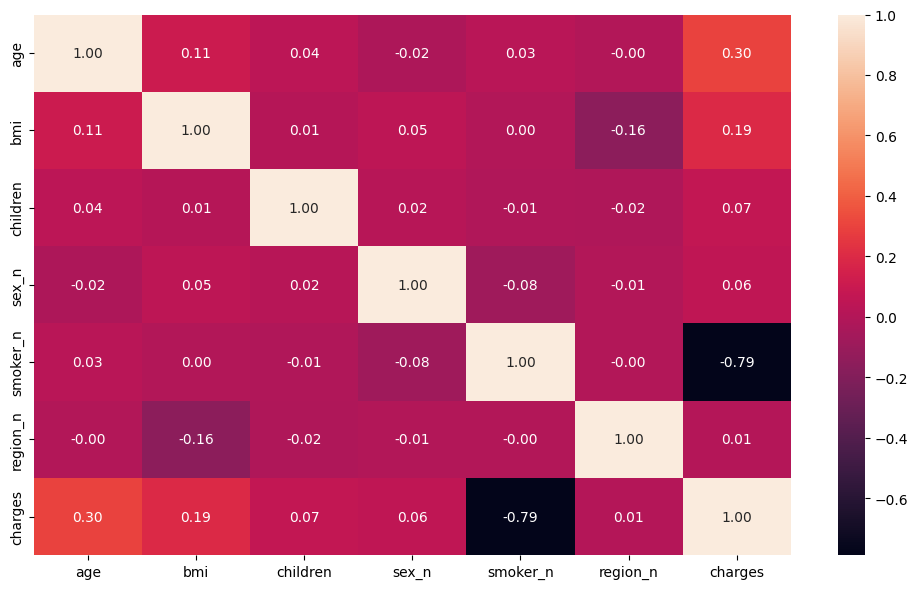

In [18]:
dm_copia["sex_n"] = pd.factorize(dm_copia["sex"])[0]
dm_copia["smoker_n"] = pd.factorize(dm_copia["smoker"])[0]
dm_copia["region_n"] = pd.factorize(dm_copia["region"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(dm_copia[["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Entreno mi modelo

In [20]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(dm_copia[num_variables])
total_data_scal = pd.DataFrame(scal_features, index = dm_copia.index, columns = num_variables)
total_data_scal.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.274382
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.010508
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.057922
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.363149
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.047781


Separo mis variables X e y,voy a dividir en entrenamiento/prueba, selecciono las 4 variables que más explican el valor de "charges".

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop("charges", axis = 1)
y = total_data_scal["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

selection_model = SelectKBest(f_regression, k = 4)
selection_model.fit(X_train, y_train)

datos_train = pd.concat([X_train, y_train], axis=1)
datos_test = pd.concat([X_test, y_test], axis=1)

selected_columns = X_train.columns[selection_model.get_support()]
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = selected_columns)
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = selected_columns)

X_train_sel.head()

# Guardar a archivos CSV
datos_train.to_csv("../data/interim/datos_entrenamiento.csv", index=False)
datos_test.to_csv("../data/interim/datos_prueba.csv", index=False)

print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (1067, 6)
Tamaño del set de prueba: (267, 6)


In [22]:
datos_train.head()

,age,bmi,children,sex_n,smoker_n,region_n,charges
1283,0.934783,0.547215,0.2,1.0,0.0,0.000000,0.805616
1112,0.217391,0.278585,0.6,0.0,1.0,0.666667,0.072939
967,0.065217,0.263250,0.4,1.0,1.0,1.000000,0.037564
599,0.000000,0.624159,0.0,0.0,1.0,0.333333,0.008898
170,0.978261,0.686306,0.0,1.0,1.0,0.333333,0.213815


Los datos los representamos en un seaborn, visualizando la relación entre ciertas variables independientes y la variable objetivo "charges"

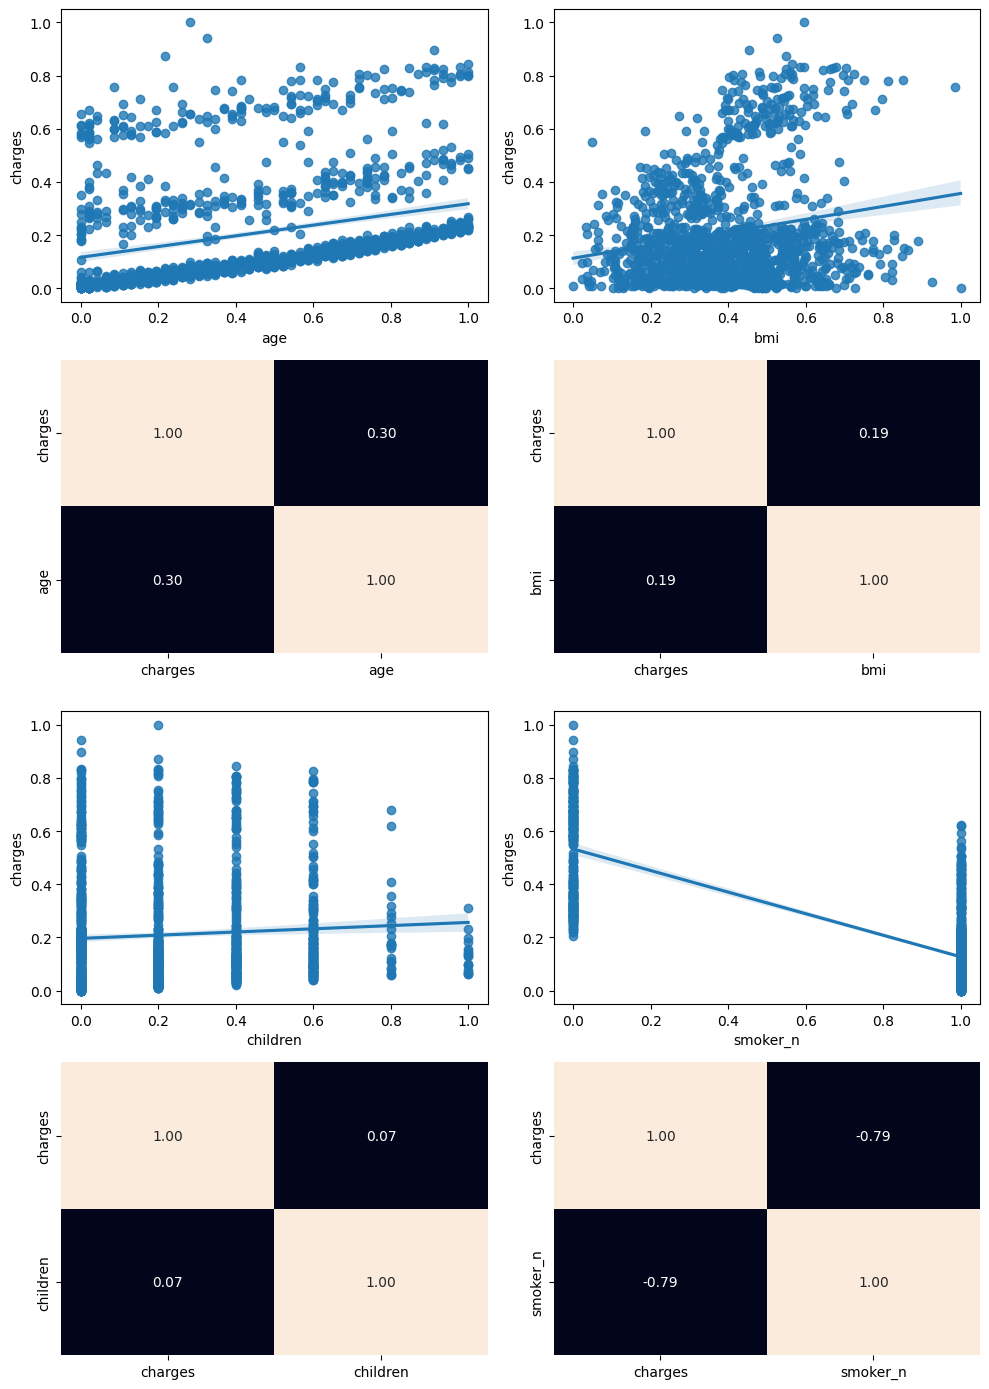

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([datos_train, datos_test])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "children", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [24]:
X_train = datos_train.drop(["charges"], axis = 1)
y_train = datos_train["charges"]

X_test = datos_train.drop(["charges"], axis = 1)
y_test = datos_train["charges"]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# modelo
reg_lin = LinearRegression()

reg_lin.fit(X_train, y_train)

print(f"Intercepto (a): {reg_lin.intercept_}")
print(f"Coeficientes (b1, b2): {reg_lin.coef_}")

Intercepto (a): 0.3368220904526419
Coeficientes (b1, b2): [ 0.20066938  0.21263967  0.05260104 -0.00246188 -0.40321508  0.01457516]


In [26]:
y_pred = reg_lin.predict(X_test)
y_pred

mse_rl = mean_squared_error(y_test, y_pred)
#rmse_rl = np.sqrt(mse_rl)
r2_rl = r2_score(y_test, y_pred)

print("MSE: ", mse_rl)
#print("RMSE: ", rmse_rl)
print("Coeficiente de determinación: ", r2_rl)

MSE:  0.010790564430351283
Coeficiente de determinación:  0.7434772667369618
